<a href="https://colab.research.google.com/github/LT1112/BME3053C-Spring-2025/blob/main/homework/homework_5_tvenstrup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\\# BME3053C - Homework 7

<br/>

<h1 align="center">Homework 7</h1>

---

<center><h2>Liam Tvenstrup</h2></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/BME3053C-Spring-2025/blob/main/lessons/02_Python_Basics.ipynb)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks


In [2]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse
 

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
 

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)
 

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise
 

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander
 

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
 

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
 

    return ecg_data
 

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

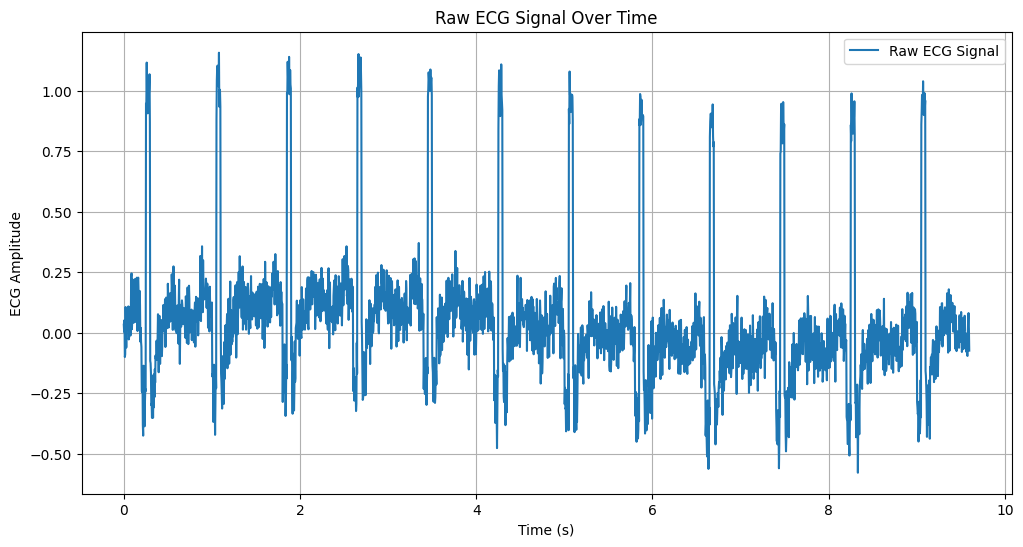

In [3]:
# Plot the raw ECG signal
plt.figure(figsize=(12, 6))
time = np.arange(len(ecg_data)) / 250  # Compute time in seconds
plt.plot(time, ecg_data, label="Raw ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Raw ECG Signal Over Time")
plt.grid(True)
plt.legend()
plt.show()

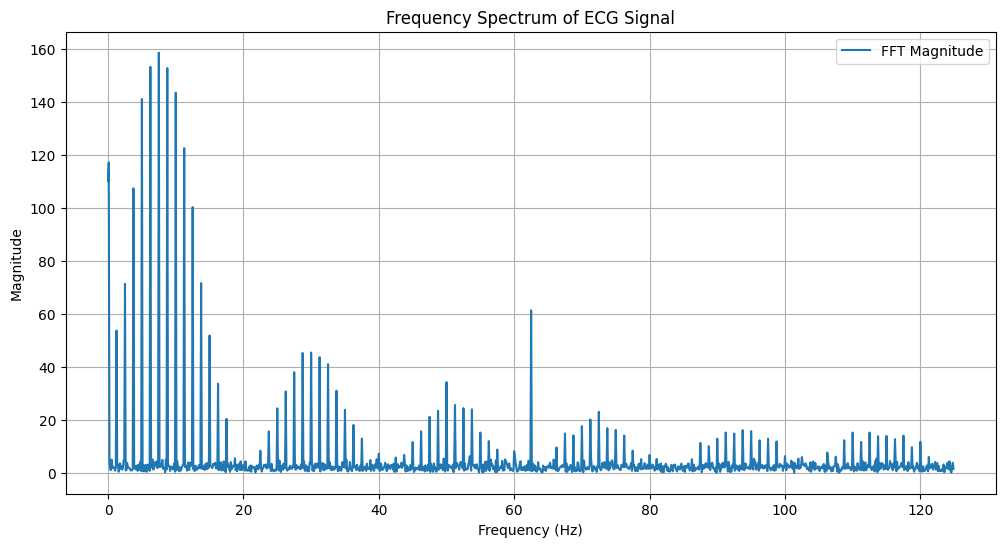

In [4]:
# Compute the Fourier transform of the ECG signal
ecg_fft = np.fft.fft(ecg_data)
magnitude = np.abs(ecg_fft)  # Compute the magnitude of the FFT
sampling_rate = 250  # Sampling rate in Hz
freqs = np.fft.fftfreq(len(ecg_data), 1 / sampling_rate)  # Frequency array

# Plot only the positive frequencies
positive_freqs = freqs[:len(freqs) // 2]
positive_magnitude = magnitude[:len(magnitude) // 2]

plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_magnitude, label="FFT Magnitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of ECG Signal")
plt.grid(True)
plt.legend()
plt.show()

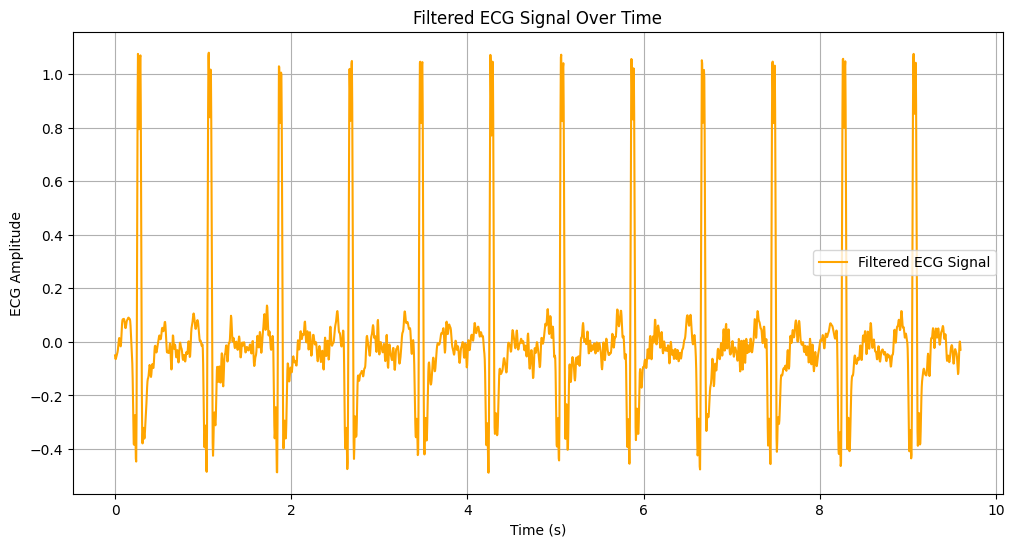

In [5]:
# Design and apply a bandpass filter in the frequency domain
low_cutoff = 0.5  # Lower cutoff frequency in Hz
high_cutoff = 40.0  # Upper cutoff frequency in Hz

# Create a mask to preserve frequencies within the range [low_cutoff, high_cutoff]
mask = (np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)

# Apply the mask to the Fourier-transformed signal
filtered_fft = ecg_fft * mask

# Reconstruct the filtered ECG signal using the inverse Fourier transform
filtered_ecg = np.fft.ifft(filtered_fft).real

# Plot the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal Over Time")
plt.grid(True)
plt.legend()
plt.show()

Calculated Heart Rate: 74.97 BPM


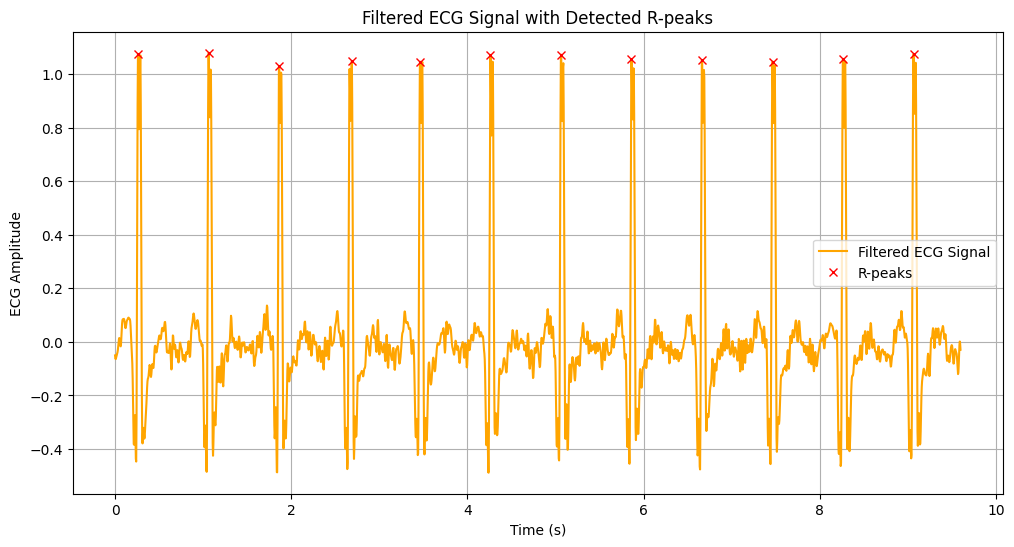

In [8]:
# Detect R-peaks in the filtered ECG signal
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=180)  # Adjust height and distance as needed

# Calculate the time intervals between successive R-peaks
peak_intervals = np.diff(peaks) / sampling_rate  # Convert intervals to seconds

# Compute the heart rate in beats per minute (BPM)
average_interval = np.mean(peak_intervals)  # Average interval between peaks in seconds
heart_rate_bpm = 60 / average_interval  # Convert to BPM

# Print the calculated heart rate
print(f"Calculated Heart Rate: {heart_rate_bpm:.2f} BPM")

# Plot the filtered ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", color="orange")
plt.plot(peaks / sampling_rate, filtered_ecg[peaks], "rx", label="R-peaks")  # Mark R-peaks
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal with Detected R-peaks")
plt.grid(True)
plt.legend()
plt.show()

**Paragraph Summary**

In this series of coding prompts, we generated synthetic ECG data, visualized it in the time domain, and analyzed its frequency components using the Fourier transform. Frequencies follow a damped sinusoidal trend, with the most prominent frequencies valuing around 10 Hz and 30 Hz. A bandpass filter was applied in the frequency domain to remove noise and retain physiologically relevant frequencies (0.5–40 Hz). This cleaned up the time domain signal plot at non-peak regions. Using the filtered signal, R-peaks were detected with find_peaks(), and the heart rate was calculated in beats per minute (BPM) based on the intervals between successive peaks. The heart rate that was received was 74.97 BPM. Adjustments to the distance parameter in find_peaks() were necessary to ensure accurate peak detection, from the sampling rate of 250 originally to 180 for the final find_peaks function. 